# Exploration and Profiling

- **Created by Andrés Segura Tinoco**
- **Created on Oct 4, 2019**

In [1]:
# Load the Pandas libraries
import pandas as pd
import pandas_profiling as pp
from pandas.plotting import scatter_matrix

In [2]:
# Load Plot libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load warnings library
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Read raw data
dataURL = "../data/dataset-single.csv"
rawdata = pd.read_csv(dataURL)

If you want to see the complete dataset, please click <a href="https://github.com/ansegura7/Keras_RegressionNN/blob/master/data/dataset-single.csv" target="_blank">here</a>.

## Data Exploration

In [5]:
# Dataframe rows and columns
rawdata.shape

(2254, 16)

In [6]:
# Preview the first 10 lines of the loaded data
rawdata.head(10)

,WellID,Date,MethodID,CHP,THP,Temp,Choke,Qinj,Bo,Zed,SpgO,SpgGP,Rel_Oper_Press,Rel_Crit_Press,WC,Test_Oil
0,84,7/23/2012,9008,305.930240,226.150470,96.87778,1.725,0.0,1.114856,0.972937,0.92303,0.799,0.739222,0.530322,0.366667,10945.72
1,84,7/24/2012,9008,306.275013,226.743155,97.46500,1.725,0.0,1.115611,0.973062,0.92303,0.799,0.740325,0.530345,0.323958,NaN
2,84,7/25/2012,9008,306.347978,227.299286,97.93182,1.725,0.0,1.116182,0.973176,0.92303,0.799,0.741964,0.530387,0.281250,NaN
3,84,7/26/2012,9008,306.309006,227.826828,99.60455,1.725,0.0,1.118186,0.973606,0.92303,0.799,0.743781,0.530576,0.325000,NaN
4,84,7/27/2012,9008,306.369882,228.283965,100.27730,1.725,0.0,1.119005,0.973771,0.92303,0.799,0.745125,0.530641,0.335000,NaN
5,84,7/28/2012,9008,312.675498,232.361358,100.82270,1.725,0.0,1.120600,0.973417,0.92303,0.799,0.743139,0.529952,0.326429,NaN
6,84,7/29/2012,9008,312.817731,232.503591,101.28640,1.725,0.0,1.121179,0.973524,0.92303,0.799,0.743256,0.529985,0.317857,NaN
7,84,7/30/2012,9008,312.485901,232.124256,101.68640,1.725,0.0,1.121612,0.973650,0.92303,0.799,0.742831,0.530068,0.309286,NaN
8,84,7/31/2012,9008,312.296304,232.219125,102.11360,1.725,0.0,1.122100,0.973772,0.92303,0.799,0.743586,0.530137,0.300714,NaN
9,84,8/1/2012,9008,312.007002,232.896154,102.38640,1.725,0.0,1.122386,0.973863,0.92303,0.799,0.746445,0.530200,0.292143,NaN


In [7]:
# Show default data types
rawdata.dtypes

WellID              int64
Date               object
MethodID            int64
CHP               float64
THP               float64
Temp              float64
Choke             float64
Qinj              float64
Bo                float64
Zed               float64
SpgO              float64
SpgGP             float64
Rel_Oper_Press    float64
Rel_Crit_Press    float64
WC                float64
Test_Oil          float64
dtype: object

In [8]:
# Describe dataframe: main stats
rawdata.describe()

,WellID,MethodID,CHP,THP,Temp,Choke,Qinj,Bo,Zed,SpgO,SpgGP,Rel_Oper_Press,Rel_Crit_Press,WC,Test_Oil
count,2254.0,2254.000000,2254.000000,2254.000000,2254.000000,2254.000000,2254.000000,2254.000000,2254.000000,2.254000e+03,2.254000e+03,2254.000000,2254.000000,2254.000000,68.000000
mean,84.0,9005.212955,242.207467,190.776250,91.138407,2.519848,2.961972,1.099543,0.975990,9.230300e-01,7.990000e-01,0.827712,0.550491,53.790977,3422.173235
std,0.0,0.770570,60.186005,21.215652,13.282599,2.079294,1.447352,0.013309,0.007963,2.909430e-14,1.798960e-14,0.177826,0.007908,27.526137,4070.715391
min,84.0,9005.000000,135.867049,125.977788,0.000000,0.725000,0.000000,1.010123,0.907691,9.230300e-01,7.990000e-01,0.342780,0.524200,0.025000,196.480000
25%,84.0,9005.000000,201.788624,175.420653,81.850000,0.725000,2.000000,1.092249,0.973931,9.230300e-01,7.990000e-01,0.759580,0.544596,42.666670,1291.120000
50%,84.0,9005.000000,217.409257,190.592220,94.305000,1.725000,4.000000,1.100507,0.978849,9.230300e-01,7.990000e-01,0.910706,0.551657,63.200000,1747.268500
75%,84.0,9005.000000,261.657907,203.630292,102.643525,4.000000,4.000000,1.109240,0.981207,9.230300e-01,7.990000e-01,0.954529,0.557787,70.666660,2925.970250
max,84.0,9008.000000,526.973265,253.885905,108.440900,7.000000,4.750000,1.123951,0.985178,9.230300e-01,7.990000e-01,1.093122,0.559697,97.000000,15459.160000


## Descriptive Statistics

In [9]:
# Get only numerical variables
num_cols = ["CHP", "THP", "Temp", "Choke", "Qinj", "Bo", "Zed", "SpgO", "SpgGP", "Rel_Oper_Press", "Rel_Crit_Press", "WC", "Test_Oil"]
num_cols

['CHP',
 'THP',
 'Temp',
 'Choke',
 'Qinj',
 'Bo',
 'Zed',
 'SpgO',
 'SpgGP',
 'Rel_Oper_Press',
 'Rel_Crit_Press',
 'WC',
 'Test_Oil']

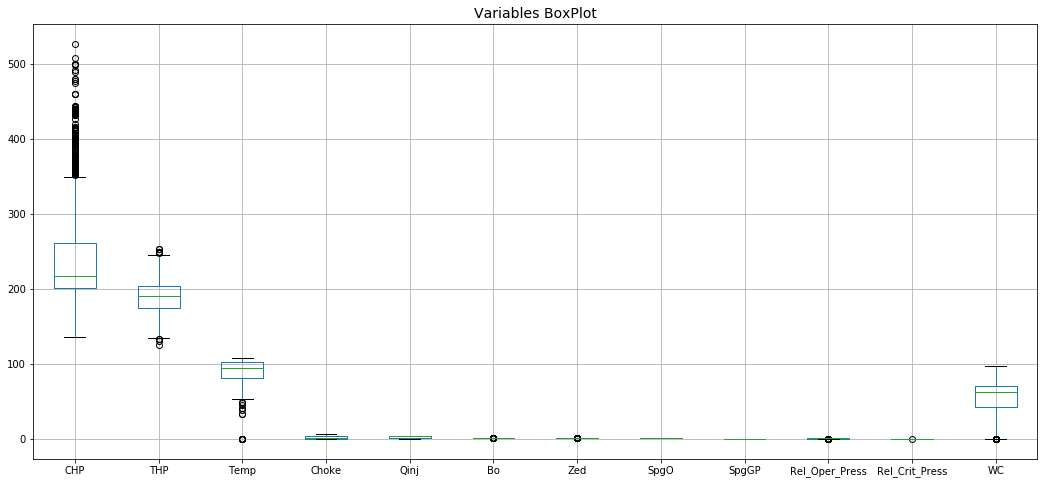

In [10]:
# Boxplot
fig = plt.figure(figsize = (18, 8))
rawdata[num_cols[:-1]].boxplot()
plt.title('Variables BoxPlot', fontsize = 14)
plt.show()

<Figure size 1296x432 with 0 Axes>

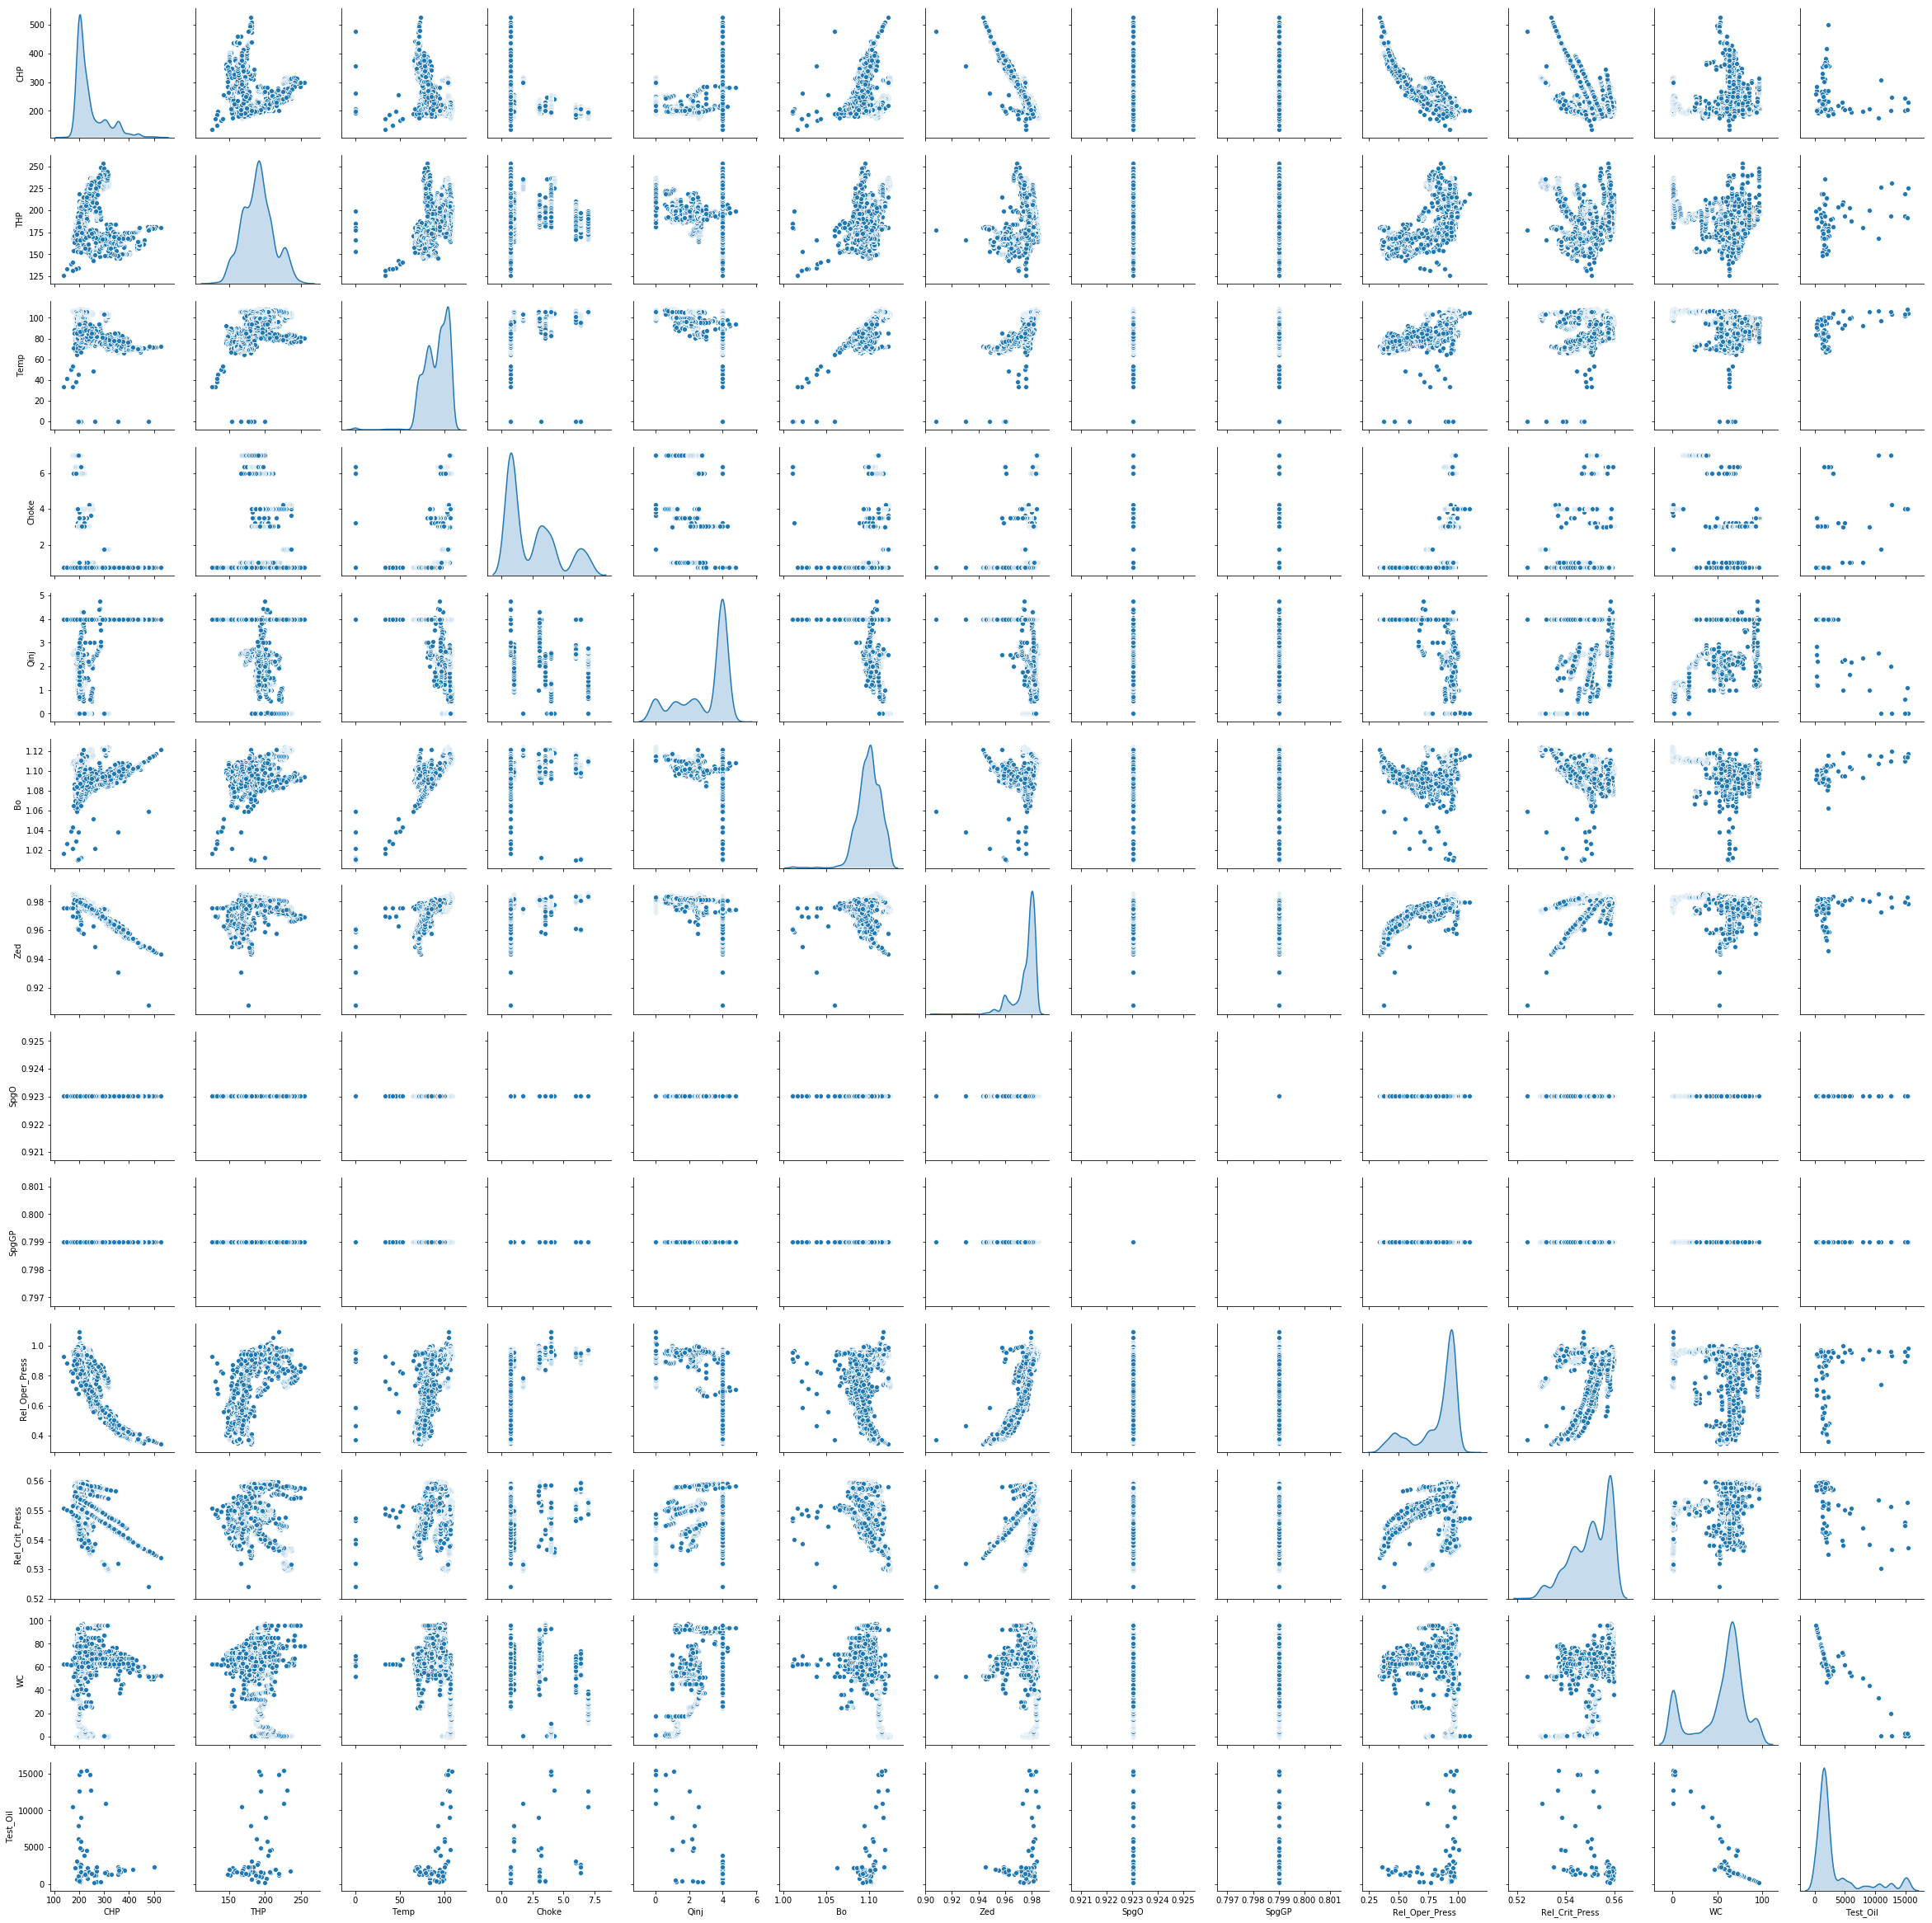

In [11]:
# Compare and plot the variables
fig = plt.figure(figsize = (18, 6))
sns.pairplot(rawdata[num_cols], diag_kind="kde")
plt.show()

## Data Profiling

In [12]:
# Showing data profiling
pp.ProfileReport(rawdata)

Number of variables,16
Number of observations,2254
Total Missing (%),6.1%
Total size in memory,281.8 KiB
Average record size in memory,128.0 B
Numeric,11
Categorical,0
Boolean,1
Date,0
Text (Unique),1
Rejected,3


## Conclusion
Variables **WellID**, **PVT_SpgO** and **PVT_SpgGP** will not be used as input of the model, because their values are constant and do not provide relevant information.

<hr>
<p><a href="https://ansegura7.github.io/Keras_RegressionNN/">« Home</a></p>